# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Кластеризация и понижение размерности

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 120 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

При необходимости установите библиотеку-расширение для `plotly`, позволяющую рисовать картинки на всплывающих окнах.

    pip install dash

In [2]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 24.9 MB/s eta 0:00:00


In [3]:
import io
import os
import base64

import numpy as np
import pandas as pd
from tqdm.cli import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.express as px
from dash import Dash, dcc, html, Input, Output, no_update, callback

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import torch
from transformers import ViTImageProcessor, ViTModel

sns.set_theme(style="darkgrid", palette="Set2")

<font size="4"><b>Внимание! Файл с решением может быть тяжелым. Если он весит 20 Мб и более, заранее разделите его на несколько частей.</b></font>

---
### Задача 1.

Докажите, что метод KMeans делит все пространство объектов на выпуклые многоугольники, возможно, неограниченные.

Заметим, что в процессе KMeans каждая точка данных присваивается ближайшему центру (формируя ячейки Вороного) на основе евклидового расстояния. Кластер включает все точки, ближайшие к этому центру по сравнению с любыми другими центрами.

Рассмотрим любые две точки x,y в пределах одного кластера. По определению кластеризации KMeans, отрезок, соединяющий x и y, будет лежать внутри этого кластера, потому что и x, и y ближе к одному и тому же центру, чем к любому другому центру. А по определению выпуклого множества это то что нам было нужно.

Таким образом, каждый кластер, сформированный методом KMeans, соответствует выпуклому многоугольнику в объектном пространстве. Это происходит потому, что кластеры формируются на основе минимизации суммы квадратов расстояний внутри кластера, гарантируя, что каждый кластер представляет собой связную область, внутри которой любые две точки могут быть соединены отрезком, лежащим полностью внутри кластера.

Значит этот метод разбивает всю плоскость на выпуклые множества (так как каждый кластер является выпуклым множеством)

---
### Задача 2.

Как мы знаем из <a href="https://miptstats.github.io/courses/ad_fivt/lecture8.pdf">лекции</a>, в пространствах большой размерности расстояния между случайными объектами становятся неинформативными. Эта проблема известна как *проклятие размерности*, и она влечет соответствующие ограничения на использование методов, основанных на использовании расстоянии между объектами.

В этой задаче предлагается промоделировать ситуацию понижения размерности. Сгенерируйте достаточно большое количество точек в единичном кубе в пространстве некоторой размерности. Пример кода дан ниже

In [ ]:
sample_size = 1000
dimention = 100
sample = np.random.uniform(size=(sample_size, dimention))

Повторите генерацию для нескольких размерностей пространства от 2 до 1000. Используйте не менее 7 различных значений размерностей пространства.

In [ ]:
dimensions = [2, 10, 50, 100, 150, 200, 300]  # Размерности пространства
sample_size = 1000  # Размер выборки

# словарь для хранения данных
data = {}

# генерируем данные для каждой выборки и сохраняем в словарь
for dim in dimensions:
  sample = np.random.uniform(size=(sample_size, dim))
  data[dim] = sample


Для каждой размерности посчитайте норму каждой точки, тем самым получая набор значений расстояния от 0 до случайной точки. Нормируйте все расстояния, поделив на среднее полученных расстояний для каждой размерности пространства.

In [ ]:
normalized_distances = {}

for dim in dimensions:
  norms = np.linalg.norm(data[dim], axis=1) # Вычисляем нормы каждой точки в выборке
  mean_norm = np.mean(norms) # Вычисляем среднее значение норм для данной размерности
  normalized_distances[dim] = norms / mean_norm # Нормируем расстояния

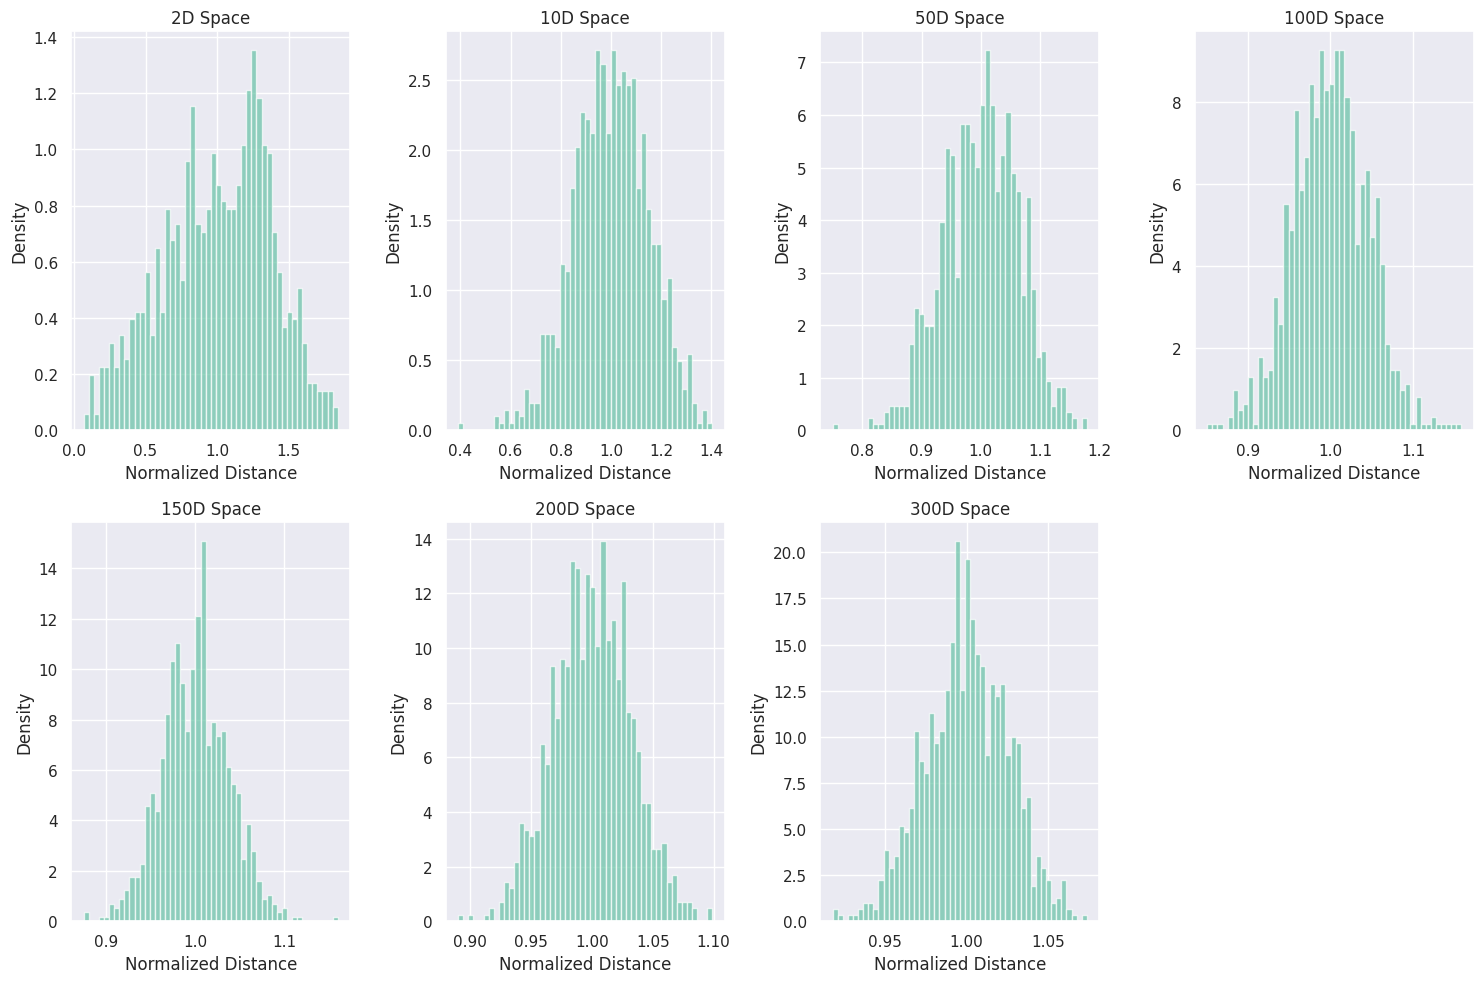

In [ ]:
# Визуализируем нормированные расстояния для каждой размерности
plt.figure(figsize=(15, 10))

for i, dim in enumerate(dimensions):
    plt.subplot(2, 4, i+1)
    plt.hist(normalized_distances[dim], bins=50, density=True, alpha=0.7)
    plt.title(f'{dim}D Space')
    plt.xlabel('Normalized Distance')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Нарисуйте на одном графике <a href="https://miptstats.github.io/courses/python/09_seaborn.html#3.-Оценки-плотности" target="_blank">KDE-оценки плотности</a> нормированных расстояний для каждой размерности пространства.

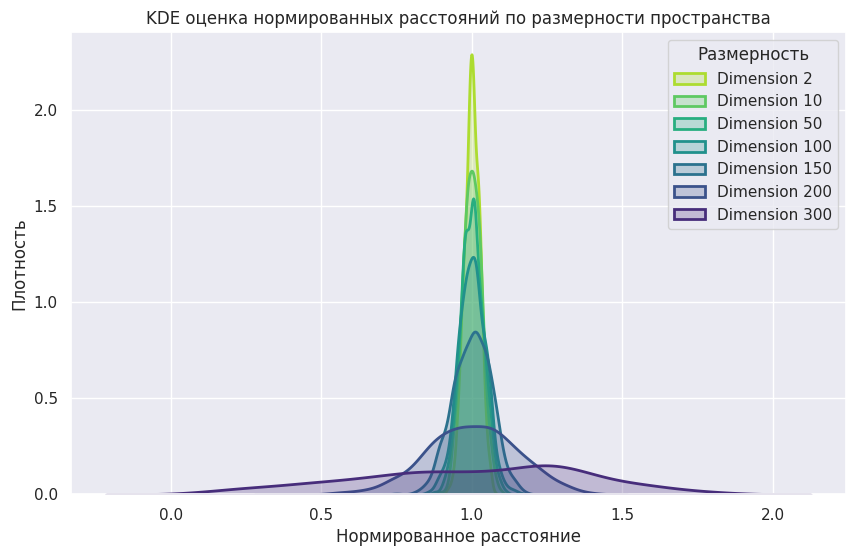

In [ ]:
# Создаем список для того чтобы можно было потом отрисовать
all_normalized_distances = []

# Добавляем нормированные расстояния
for dim in dimensions:
  all_normalized_distances.extend(normalized_distances[dim])

# Создаем DataFrame из списка нормированных расстояний
df_normalized_distances = pd.DataFrame({
    'Dimension': np.repeat(dimensions, sample_size),  # Повторяем размерности для соответствующего числа точек
    'Normalized Distance': all_normalized_distances
})
# Создаем словарь с палитрой цветов для каждой размерности
palette = sns.color_palette("viridis", n_colors=len(dimensions))

# Создаем график KDE-оценок плотности
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized_distances, x='Normalized Distance', hue='Dimension', fill=True, linewidth=2, palette=palette)

plt.title('KDE оценка нормированных расстояний по размерности пространства')
plt.xlabel('Нормированное расстояние')
plt.ylabel('Плотность')

legend_labels = [f'Dimension {dim}' for dim in dimensions]
plt.legend(title='Размерность', labels=legend_labels, loc='upper right')

plt.show()

Сделайте выводы

По графику выше можно заметить следующие вещи:

1. С увеличением размерности пространства наблюдается изменение формы распределения нормированных расстояний. Видно, что при низких размерностях (например, 2D и 10D) распределение более компактное и острое, а при более высоких размерностях (например, 200D и 300D) оно становится более широким и плоским.

2. Подтверждена концепция "проклятия размерности", которое проявляется в том, что при увеличении размерности пространства расстояния между случайными точками становятся менее информативными. Это происходит из-за того, что в многомерных пространствах точки становятся более удалёнными друг от друга, что затрудняет анализ и классификацию данных.

3. Видно, что распределения нормированных расстояний сильно различаются в зависимости от размерности пространства. Это связано с тем, что с увеличением размерности количество возможных состояний и комбинаций также увеличивается, что влияет на структуру данных и расстояний между ними.

В итоге мы выяснили, что увеличение размерности приводит к более размытым распределениям, что означает, что все точки становятся примерно равноудаленными друг от друга относительно начала координат.

---
### Задача 3.

В этой задаче мы попробуем кластеризовать различными способами изображения котиков из датасета с <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">семинара</a>.

Скачайте данные, загрузите их и отрисуйте несколько примеров.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
# подключим Google Drive
from google.colab import drive

In [6]:
drive.mount("/content/drive")


Mounted at /content/drive


In [7]:
# пути к нужным папкам в Drive
cats_path = "/content/drive/MyDrive/Colab Notebooks/cats"
cats = []

Размерность cats: (15747, 12288)


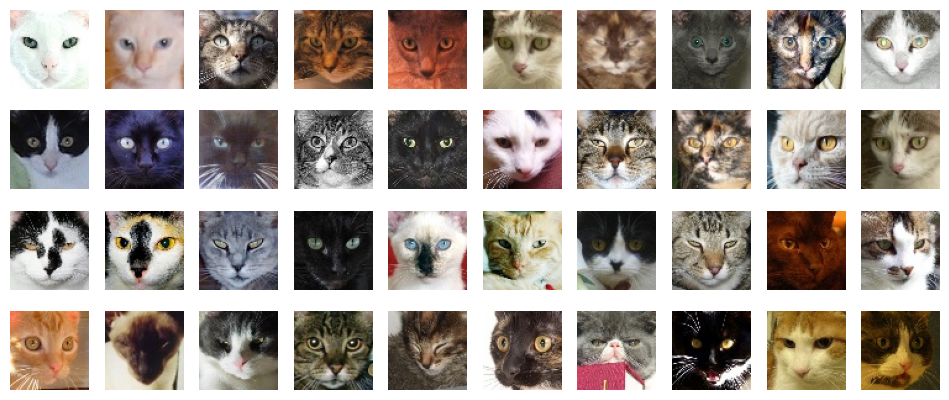

In [8]:
# Загрузка изображений
for filename in os.listdir(cats_path):
    cats.append(plt.imread(os.path.join(cats_path, filename)))

cats = np.stack(cats).reshape(-1, 64 * 64 * 3)
print(f"Размерность cats: {cats.shape}")

# Визуализируем примеры
plt.figure(figsize=(12, 5))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(cats[i].reshape(64, 64, 3))
    plt.axis("off")

#### 1. Свойства метрики в пространстве котиков

Прежде всего давайте исследуем, наблюдается ли проблема проклятия размерности в пространстве котиков, фактически повторив исследование предыдущей задачи. Для этого выберите не менее 10000 случайных пар изображений и посчитайте расстояния между ними. Визуализируйте <a href="https://miptstats.github.io/courses/python/09_seaborn.html#3.-Оценки-плотности" target="_blank">KDE-оценку плотности</a> нормированных расстояний.

Повторите те же действия к результату применения PCA, рассмотрев разное количество компонент, например, для 30, 100 и 500. Обратите внимание, что PCA нужно обучать на всех изображениях, а не только для тех, для которых вы будете считать расстояния. Примеры обучения PCA можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">ноутбуке</a> с занятия.

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances

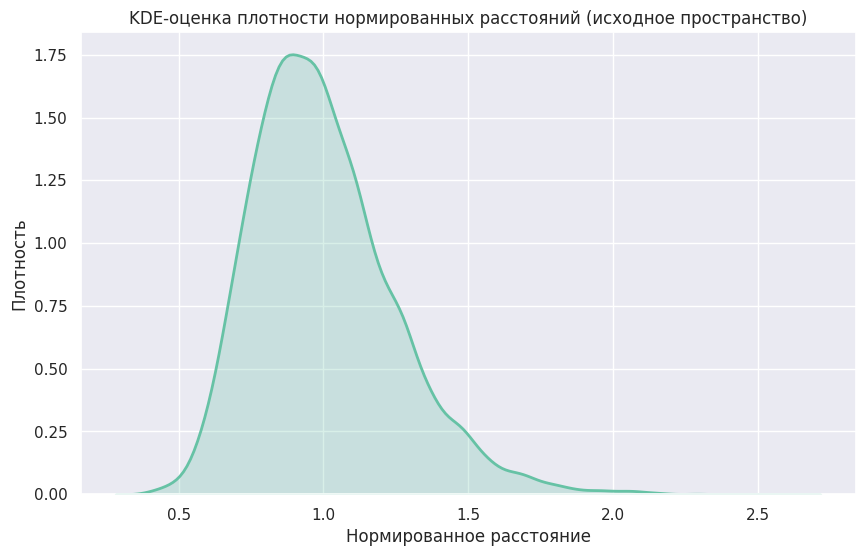

In [ ]:
# Выбор случайных пар изображений
np.random.seed(42)
n_pairs = 100
idx1 = np.random.choice(len(cats), size=n_pairs)
idx2 = np.random.choice(len(cats), size=n_pairs)
image_pairs = cats[idx1], cats[idx2]

# Вычисление расстояний между парами изображений
distances = pairwise_distances(image_pairs[0].reshape(len(idx1), -1), image_pairs[1].reshape(len(idx2), -1))
mean_distance = np.mean(distances)  # Среднее расстояние между изображениями

# Нормирование расстояний
normalized_distances = distances / mean_distance

# Визуализация KDE-оценки плотности нормированных расстояний
plt.figure(figsize=(10, 6))
sns.kdeplot(normalized_distances.ravel(), fill=True, linewidth=2)
plt.title('KDE-оценка плотности нормированных расстояний (исходное пространство)')
plt.xlabel('Нормированное расстояние')
plt.ylabel('Плотность')
plt.show()

In [ ]:
# Обучение PCA на всех изображениях котиков
pca_30 = PCA(n_components=30)
pca_100 = PCA(n_components=100)
pca_500 = PCA(n_components=500)

cats_projection_30 = pca_30.fit_transform(cats.reshape(len(cats), -1))
cats_projection_100 = pca_100.fit_transform(cats.reshape(len(cats), -1))
cats_projection_500 = pca_500.fit_transform(cats.reshape(len(cats), -1))


In [ ]:
# Функция для вычисления нормированных расстояний
def calculate_normalized_distances(cats_projection, n_components):
    np.random.seed(42)
    n_pairs = 100
    idx1 = np.random.choice(len(cats_projection), size=n_pairs)
    idx2 = np.random.choice(len(cats_projection), size=n_pairs)
    pca_image_pairs = cats_projection[idx1], cats_projection[idx2]

    pca_distances = pairwise_distances(pca_image_pairs[0], pca_image_pairs[1])
    pca_mean_distance = np.mean(pca_distances)
    pca_normalized_distances = pca_distances / pca_mean_distance

    return pca_normalized_distances.ravel()

# Вычисление нормированных расстояний для разного количества компонент PCA
normalized_distances_30 = calculate_normalized_distances(cats_projection_30, 30)
normalized_distances_100 = calculate_normalized_distances(cats_projection_100, 100)
normalized_distances_500 = calculate_normalized_distances(cats_projection_500, 500)

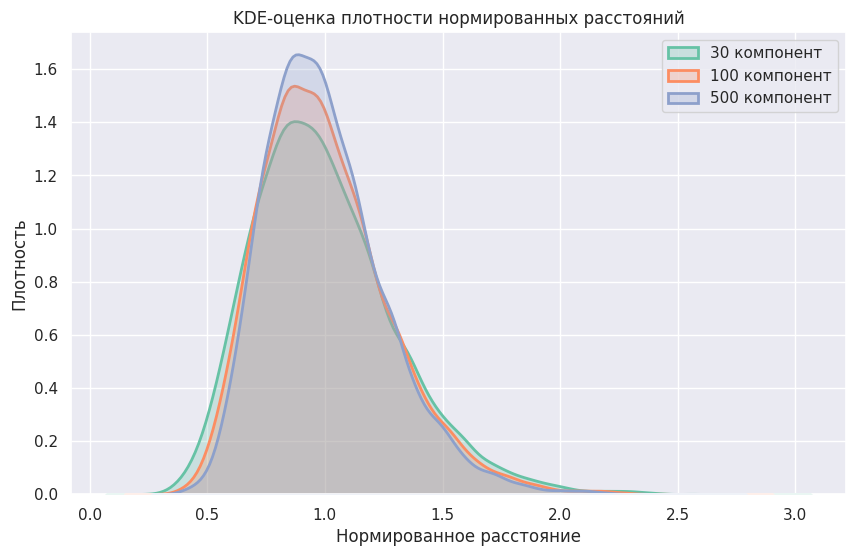

In [ ]:
# Визуализация KDE-оценок на одном графике
plt.figure(figsize=(10, 6))
sns.kdeplot(normalized_distances_30, fill=True, linewidth=2, label='30 компонент')
sns.kdeplot(normalized_distances_100, fill=True, linewidth=2, label='100 компонент')
sns.kdeplot(normalized_distances_500, fill=True, linewidth=2, label='500 компонент')

plt.title('KDE-оценка плотности нормированных расстояний')
plt.xlabel('Нормированное расстояние')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Сделайте выводы

Судя по графикам можно сделать предположение о том, что проклятие размерности не так явно проявляется в этом конкретном случае. Возможно, есть несколько объяснений для этого:

1. Не большой выбор пар изображений (оперативки не хватало)

2. Возможно, случайный выбор пар изображений не полностью отражает структуру всего пространства данных. Более сложные или разнообразные наборы данных могли бы лучше показать эффект проклятия размерности.

3. Изображения котиков могут иметь относительно простую структуру, которая не сильно страдает от проклятия размерности в сравнении с более сложными данными.

#### 2. Кластеризация котиков по вектору изображения

Начнем эксперименты с самого простого способа: каждое изображение можно вытянуть в вектор размерности $64 \cdot 64 \cdot 3$, их и попытаемся кластеризовать. Обучите по этим объектам метод KMeans, пример можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/clustering.html" target="_blank">ноутбуке</a> по кластеризации

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
%%time
# <...>

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs


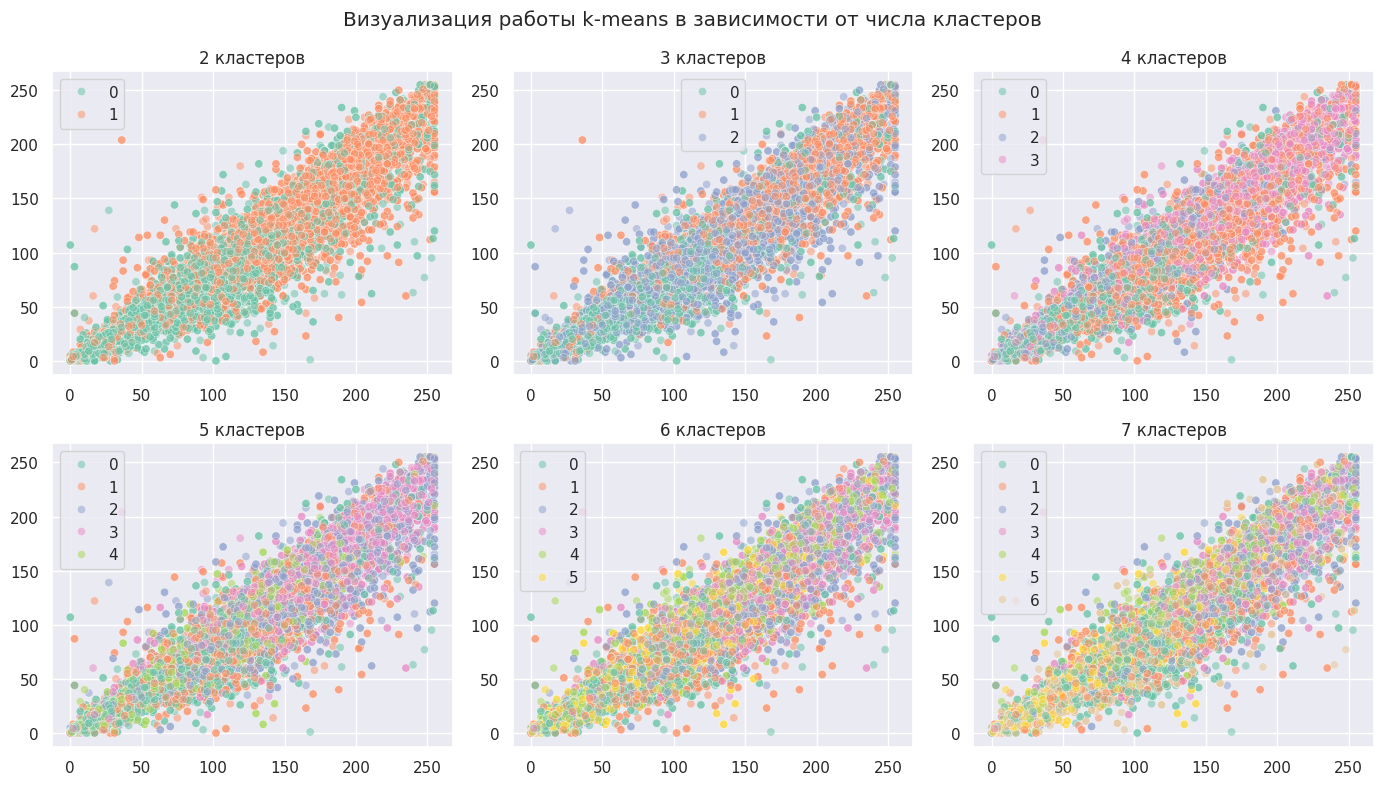

In [ ]:
# Визуализация работы k-means в зависимости от числа кластеров
fig = plt.figure(figsize=(14, 8))
fig.suptitle("Визуализация работы k-means в зависимости от числа кластеров")

for n_clusters in range(2, 8):
    # Создание и обучение модели KMeans
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=42)
    kmeans.fit(cats)
    y_pred = kmeans.predict(cats)

    # Визуализация результатов с использованием двух случайных признаков из вектора
    # Мы можем выбрать любые два признака из вектора для визуализации
    #random_feature1 = np.random.randint(0, cats.shape[1])
    #random_feature2 = np.random.randint(0, cats.shape[1])

    plt.subplot(2, 3, n_clusters - 1)
    sns.scatterplot(x=cats[:, 0], y=cats[:, 1], hue=y_pred, palette="Set2", alpha=0.5)
    plt.title(f"{n_clusters} кластеров")
    #plt.xlabel(f"Feature {random_feature1}")
    #plt.ylabel(f"Feature {random_feature2}")

plt.tight_layout()
plt.show()

Теперь отобразим изображения на плоскость с помощью PCA и визуализируем полученные предсказания цветом, как это было сделано на семинаре для ответов на вопросы в бот. Ниже уже реализована функция отрисовки `visualize_images_clusterisation`, вам требуется лишь применить PCA и вызвать функцию с правильными параметрами.

In [ ]:
def visualize_images_clusterisation(images, projection, clusters, port=None):
    """
    Визуализиует двумерную проекцию эмбеддингов изображений,
    во всплывающем окне показывает сами изображения

    :param images: набор изображений
    :param projection: двумерная проекция изображений или эмбеддингов изображений
    :param clusters: предсказанные кластера
    :param port: опциональный параметр, порт на котором поднимается визуализация:
                 одинаковые порты - одинаковые графики, но если в ноутбуке открыто много портов, то могут начаться лаги
    """
    # Рисуем график с точками как на семинаре
    fig = px.scatter(
        x=projection[:, 0],
        y=projection[:, 1],
        hover_name=clusters,
        hover_data={"image_idx": list(range(len(images)))},
        color=clusters.astype(str),
        width=1000,
        height=800,
        title="PCA проекция изображений на плоскость",
        size=[1] * len(images),
        size_max=12,
    )

    # Добавляем во всплывающее окошко (hover box) изображения
    fig.update_traces(
        hoverinfo="none",
        hovertemplate=None,
    )

    app = Dash(__name__)

    app.layout = html.Div(
        className="container",
        children=[
            dcc.Graph(id="graph-2-dcc", figure=fig, clear_on_unhover=True),
            dcc.Tooltip(id="graph-tooltip-2", direction="bottom"),
        ],
    )

    @callback(
        Output("graph-tooltip-2", "show"),
        Output("graph-tooltip-2", "bbox"),
        Output("graph-tooltip-2", "children"),
        Output("graph-tooltip-2", "direction"),
        Input("graph-2-dcc", "hoverData"),
    )
    def display_hover(hoverData):
        """
        Настраивает всплывающее окно hover box.

        :param hoverData: данные соответствующей точки
        """
        if hoverData is None:
            return False, no_update, no_update, no_update

        # Достаем индекс картинки, который выше положили в hover_data
        hover_data = hoverData["points"][0]
        image_idx = hover_data["customdata"][0]
        # И получаем само изображение кота
        image = Image.fromarray(images[image_idx].reshape(64, 64, 3))

        # Преобразовываем изображение в base64 кодировку
        buffer = io.BytesIO()
        image.save(buffer, format="jpeg")
        encoded_image = base64.b64encode(buffer.getvalue()).decode()
        image_url = "data:image/jpeg;base64, " + encoded_image

        image_children = [
            html.Img(
                src=image_url,
                style={"width": "196px"},
            ),
        ]

        return True, hover_data["bbox"], image_children, "top"

    if port is None:
        port = str(np.random.randint(5000, 15000))
    app.run(port=port, debug=True, jupyter_height=800)

    return app

In [ ]:
# Делаем проекцию
pca = PCA(n_components=100)
cats_projection = pca.fit_transform(cats.astype(np.float32))

In [ ]:
# Предсказываем кластеры на основе полученной проекции
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(cats_projection)

# Визуализируем проекцию изображений с цветовой разметкой кластеров
visualize_images_clusterisation(cats, cats_projection, clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<IPython.core.display.Javascript object>

Для каждого кластера нарисуйте по 5-10 типичных изображений, то есть ближайших к центру кластера. Похожую операцию мы видели на занятии в <a href="https://miptstats.github.io/courses/ad_fivt/clustering.html" target="_blank">ноутбуке</a> по кластеризации.

*Примечание.* Для одного кластера рисуйте картинки "в строчку". Так будет удобно как вам самим, так и проверяющему. Примеры можно посмотреть в <a href="https://miptstats.github.io/courses/ad_fivt/pca.html" target="_blank">ноутбуке</a> по PCA.

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

In [31]:
def plot_typical_images(images, cluster_centers, cluster_labels, n_images=5):
    """
    Plots typical images closest to each cluster center.

    :param images: Array of images.
    :param cluster_centers: Array of cluster centers in the projected space.
    :param cluster_labels: Cluster labels assigned to each image.
    :param n_images: Number of typical images to plot per cluster.
    """
    unique_clusters = np.unique(cluster_labels)

    for cluster in unique_clusters:
        # Find indices of images belonging to the current cluster
        cluster_indices = np.where(cluster_labels == cluster)[0]

        # Calculate cluster center for the current cluster
        cluster_center = np.mean(images[cluster_indices], axis=0)

        # Calculate distances to the cluster center for all images
        distances = np.linalg.norm(images - cluster_center, axis=1)

        # Sort images by distance to the cluster center and get closest ones
        closest_indices = np.argsort(distances)[:n_images]

        # Plot the closest images for the current cluster
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Cluster {cluster}", fontsize=14)
        for i, idx in enumerate(closest_indices):
            plt.subplot(1, n_images, i + 1)
            plt.imshow(images[idx].reshape(64, 64, 3))
            plt.axis("off")
        plt.show()

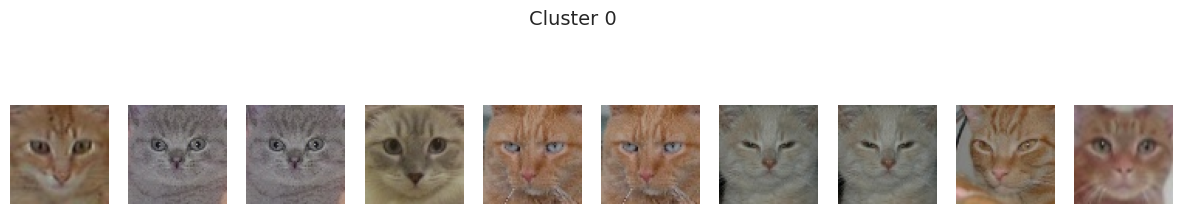

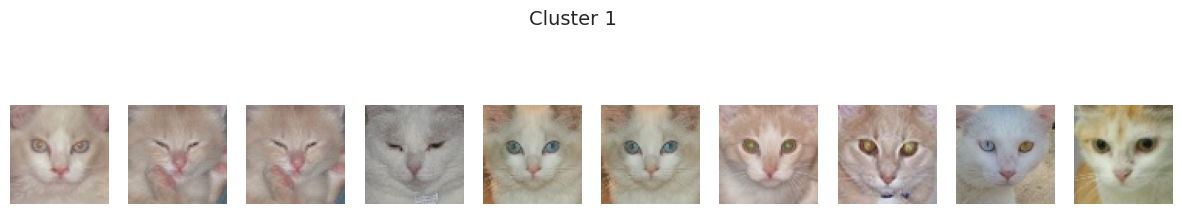

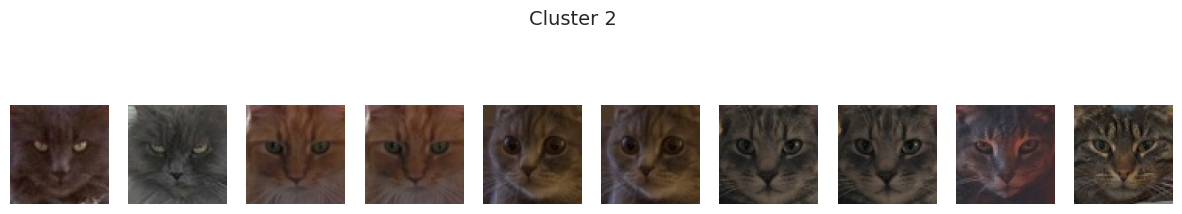

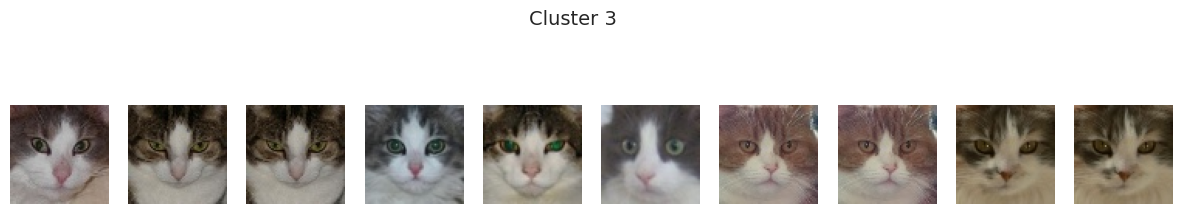

In [ ]:
cluster_centers = kmeans.cluster_centers_

# Отображаем по 5-10 типичных изображений для каждого кластера
plot_typical_images(cats, cluster_centers, clusters, n_images=10)

Наблюдаются ли какие-то закономерности в изображениях внутри одного кластера? Если да, то опишите отличительные черты кластеров.

Кластеры в основном зависят от цветовой гаммы изображений, кластер 1 имеет цветлые, 2 имеет темные, 3 имеет изображение котиков у которых нижняя часть морды белая. Дополнительно ещё влияет выражение лица (в кластере 0 у всех лицо будто обижены)

Подумайте, чем может быть плох такой подход? Какая проблема могла возникнуть и возникла ли? Обратите внимание на проведенное ранее исследование.

1. Неоднородность кластеров: Кластеры могут быть неоднородными из-за различий в освещении, точке обзора, масштабе и других факторах, которые могут влиять на внешний вид изображения.

2. Чувствительность к параметрам: Результаты кластеризации могут сильно зависеть от выбора числа кластеров (гиперпараметра) или других параметров алгоритма. Не всегда легко выбрать оптимальные значения этих параметров.

3. Интерпретируемость: Некоторые кластеры могут быть сложными для интерпретации или объяснения, особенно если мы сталкиваемся с нечеткими или перекрывающимися группами изображений.

4. Потребность в дополнительной обработке

#### 3. PCA + кластеризация

Попробуем уменьшить размерность перед кластеризацией с помощью PCA, спроектировав изображения на первые несколько главных компонент

**Примечание.** Не стоит брать больше 100 главных компонент

Сделайте кластеризацию:

In [9]:
%%time
# <...>

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [10]:
# Применяем PCA для уменьшения размерности
n_components = 70  # Выбираем количество главных компонент
pca = PCA(n_components=n_components)
cats_pca = pca.fit_transform(cats)

In [11]:
# Применяем кластеризацию (например, KMeans) к полученным проекциям
n_clusters = 5  # Задаем количество кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(cats_pca)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Визуализируйте полученные кластера:

In [ ]:
# Визуализируем проекцию PCA с цветовой разметкой кластеров
visualize_images_clusterisation(cats, cats_pca, cluster_labels)

<IPython.core.display.Javascript object>

In [23]:
# Создаем интерактивную визуализацию с помощью Plotly Express
fig = px.scatter(
    x=cats_pca[:, 0],  # Первая компонента PCA
    y=cats_pca[:, 1],  # Вторая компонента PCA
    hover_name=cluster_labels,  # Метки кластеров для всплывающих подсказок
    #hover_data={"answer": cats},  # Дополнительные данные для всплывающих подсказок
    color=cluster_labels.astype(str),  # Разметка кластеров цветами
    width=1000,
    height=800,
    title="PCA проекция эмбеддингов на двумерное пространство с разметкой кластеров",
    size=[1] * len(cats),
    size_max=10,
)

# Отображаем график
fig.show()

Нарисуйте по 5-10 типичных изображений для новых кластеров

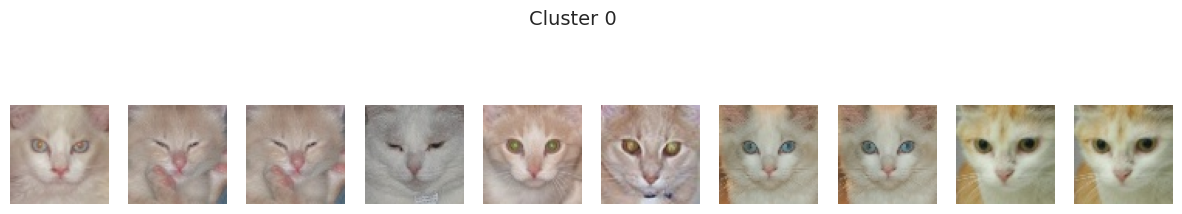

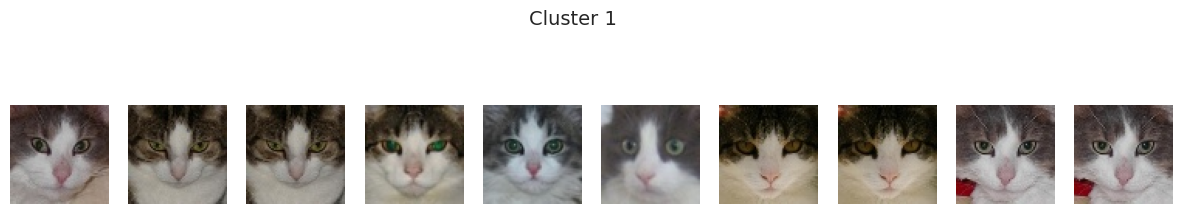

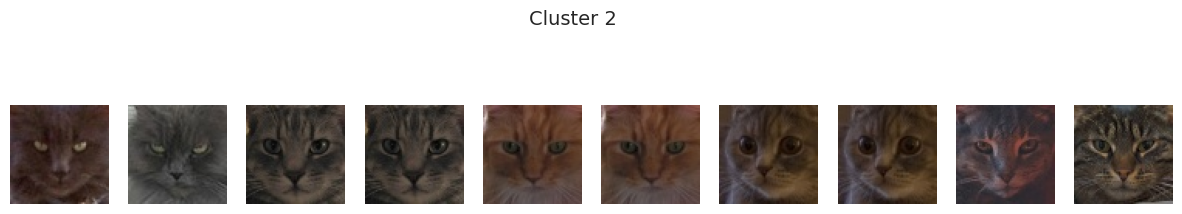

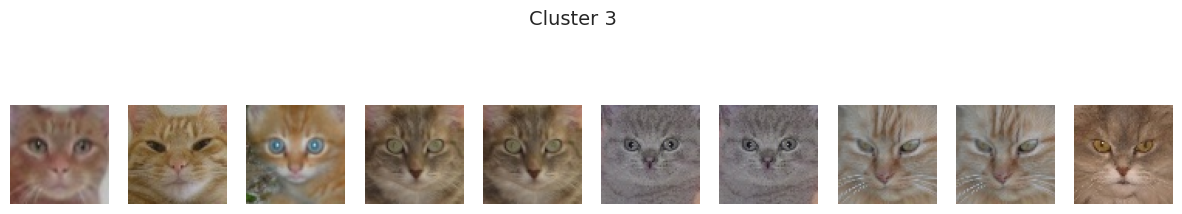

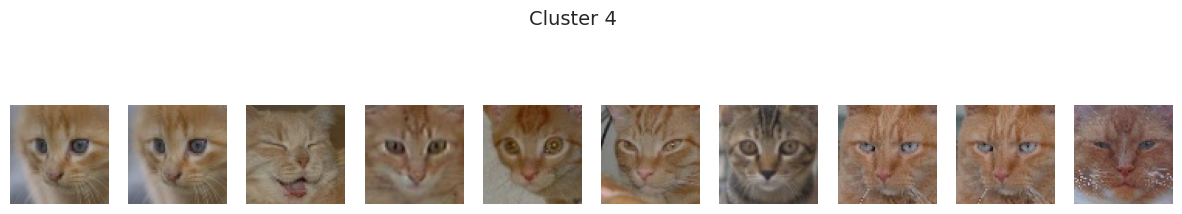

In [ ]:
cluster_centers = kmeans.cluster_centers_

plot_typical_images(cats, cluster_centers, cluster_labels, n_images=10)

Опишите отличительные черты кластеров:

1. Всё так же основная цветовая гамма, и выражения лиц

2. Более компактные кластеры

3. Изменение характера кластеров: После PCA могут измениться характеры кластеров. Например, некоторые кластеры могут быть более однородными или разнородными в новом пространстве признаков.

Сильно ли они отличаются от предыдущего способа?

Нет, но вроде бы немного лучше кластеризует котиков. Есть ещё риск потери информации при уменьшении размерности(хотя в нашем случае вроде всё окей).

#### 4. Нейросетевые эмбеддинги + кластеризация

Попробуем применить к изображениям такой же подход, как с текстами. То есть возьмем хорошую уже обученную нейросеть, получим с ее помощью эмбеддинги изображений и будем дулеть кластеризацию этих эмбеддингов.

Выберите на <a target="_blank" href="https://huggingface.co/models">huggingface</a> модель для получения эмбеддингов изображений.

**Примечания**
- Нам нужны `CV` модели для задачи извлечения признаков (в фильтрах huggingface называются `Image Feature Extraction`).
- Не выбирайте слишком тяжелые модели (с суффиксами `-huge`, `-giant`, `-large` и прочим), нам это ни к чему, так как картинки маленькие и простые. К тому же это замедлит предсказание эмбеддингов.
- Обычно в карточке модели есть пример применения, который можно скопировать и как в семинаре в цикле применить ко всем батчам изображениям.
- Некоторые модели могут возвращать не эмбеддинг размерности `(D,)`, а матрицу признаков размерности `(n, D)`, в этому случае надо применить average-pooling, усреднив по предпоследней оси.

Загрузите модель, примените к одному тестовому изображению кота и посмотрите на размерность полученного тензора

In [13]:
from transformers import CLIPProcessor, CLIPModel

In [14]:
example_image = cats[0].reshape(64, 64, 3)

# Загрузка модели CLIP
model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(model_name)
# Загрузка процессора для CLIP
clip_processor = CLIPProcessor.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [19]:
# Перемещение модели на устройство GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
clip_model = clip_model.to(device)

In [15]:
# Подготовка изображения для CLIP
image_np = np.array([example_image])


In [16]:
# Предварительная обработка изображения с использованием CLIP Processor
inputs = clip_processor(text=["a photo of a cat"], images=example_image, return_tensors="pt", padding=True)

# Получение эмбеддингов изображения от модели CLIP
with torch.no_grad():
    # Извлечение признаков изображения
    image_features = clip_model.get_image_features(pixel_values=inputs.pixel_values)

# Вывод размерности эмбеддингов изображения
print(image_features.shape)

torch.Size([1, 512])


Теперь примените загруженную модель ко всем картинкам

In [22]:
# Список для хранения всех эмбеддингов изображений
all_image_features = []
# Применение модели CLIP ко всем изображениям
for image_np in cats:
    # Предварительная обработка изображения с использованием CLIP Processor
    image_np = image_np.reshape(64, 64, 3)
    inputs = clip_processor(images=image_np, return_tensors="pt")

    # Перемещение входных данных на устройство GPU
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Получение эмбеддингов изображения от модели CLIP
    with torch.no_grad():
        # Извлечение признаков изображения
        image_features = clip_model.get_image_features(**inputs)

        # Добавление эмбеддинга в список всех эмбеддингов
        all_image_features.append(image_features)

In [24]:
# Проверка наличия эмбеддингов перед объединением
if len(all_image_features) > 0:
    # Преобразование списка эмбеддингов в тензор
    all_image_features_tensor = torch.cat(all_image_features, dim=0)

    # Вывод размерности полученного тензора всех эмбеддингов
    print("Размерность всех эмбеддингов изображений:", all_image_features_tensor.shape)
else:
    print("Список всех эмбеддингов пустой.")

Размерность всех эмбеддингов изображений: torch.Size([15747, 512])


Сделайте кластеризацию полученных эмбеддингов

In [32]:
all_image_features_np = torch.cat(all_image_features, dim=0).cpu().numpy()  # Копируем и объединяем тензоры на хосте

# Уменьшение размерности эмбеддингов с помощью PCA для визуализации
pca = PCA(n_components=70)
cats_pca = pca.fit_transform(all_image_features_np)

# Кластеризация эмбеддингов с помощью K-means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(all_image_features_np)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Визуализируйте полученные кластера:

In [33]:
# Создаем интерактивную визуализацию с помощью Plotly Express
fig = px.scatter(
    x=cats_pca[:, 0],  # Первая компонента PCA
    y=cats_pca[:, 1],  # Вторая компонента PCA
    hover_name=cluster_labels,  # Метки кластеров для всплывающих подсказок
    color=cluster_labels.astype(str),  # Разметка кластеров цветами
    width=1000,
    height=800,
    title="PCA проекция эмбеддингов на двумерное пространство с разметкой кластеров",
    size=[1] * len(cats),
    size_max=10,
)

# Отображаем график
fig.show()

Нарисуйте по 5-10 типичных изображений для новых кластеров

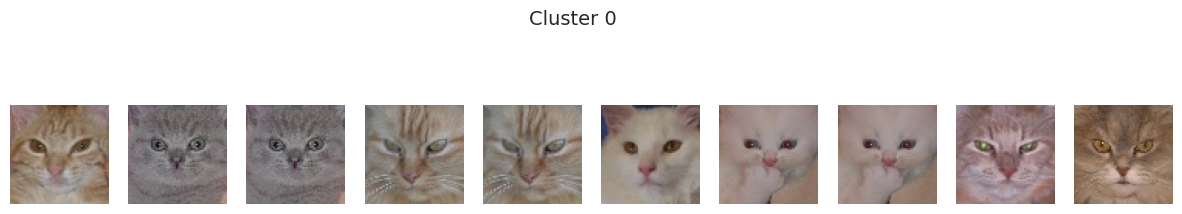

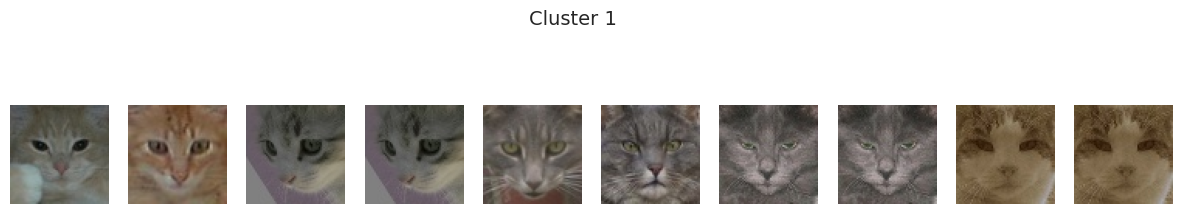

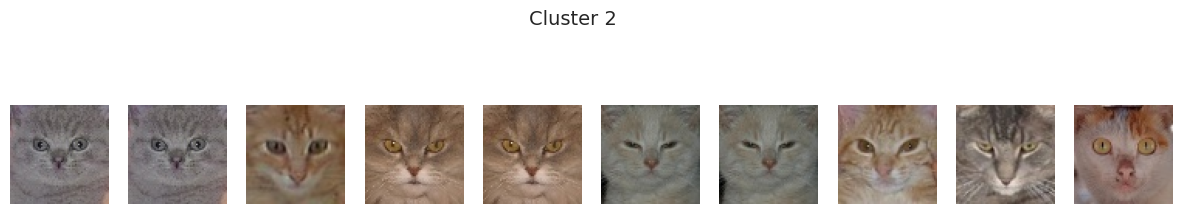

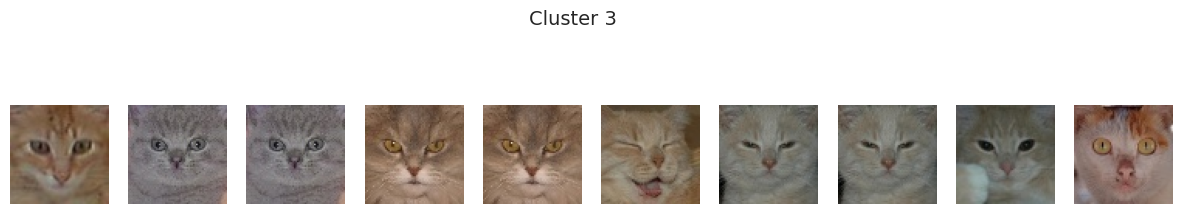

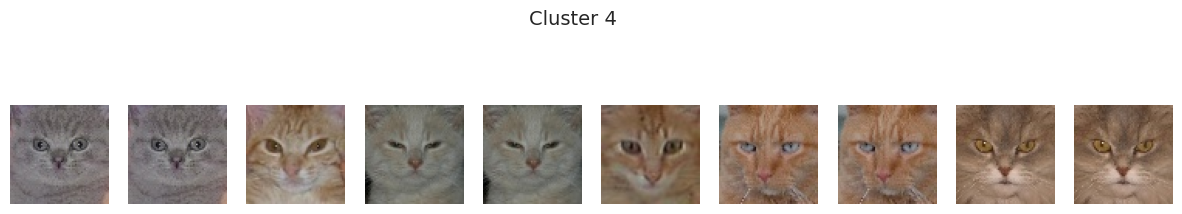

In [34]:
cluster_centers = kmeans.cluster_centers_
# Вывод типичных изображений для каждого кластера
plot_typical_images(cats, cluster_centers, cluster_labels, n_images=10)

Опишите отличительные черты кластеров:

Тут как будто выбранная мною модель плохо работает с данной задачей, из-за чего кластеры много где пересекаются

Чем отличаются кластеры, полученные этим способом от первых двух?

Если найдешь хорошо обученную нейросетку, то жизнь в шоколаде, а если нет, то получается как у меня

#### 5. Выводы
Сделайте выводы:

Можно заметить что для кластеризации изображений метод KMeans работает неплохо, и при комбинировании LCA на данной задаче можно получить довольно хорошие результаты. Способ кластеризации с помощью нейросетки очень интересен, однако имеет ряд недостатков таких, как поиск хорошей модели, требование гпу на устройстве.

В ходе выполнения данного задания мною было выявлено главная сложность кластеризации (касается всех методов) - на большом наборе данных требует невообразимые ресурсы и времени (на 10^6 пар изображений моих 8 Гб оперативки вообще не хватало)